# <a href="Resources/pdf/5_Decision_Tree_Classifier_and_Regressor_230828_210513.pdf">Decision Tree</a>

# 1. Decision Tree Classifier

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [7]:
dataset = load_iris()
print(dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [11]:
df = sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [14]:
##Independent and dependent features
X = df.iloc[:,:-1]
y = dataset.target

In [18]:
### train test split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)
print(x_train.shape,x_test.shape)

(100, 4) (50, 4)


### Post Pruning

[Text(0.4444444444444444, 0.9285714285714286, 'x[3] <= 0.8\nentropy = 1.583\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.3333333333333333, 0.7857142857142857, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.5555555555555556, 0.7857142857142857, 'x[3] <= 1.75\nentropy = 1.0\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.3333333333333333, 0.6428571428571429, 'x[2] <= 5.35\nentropy = 0.485\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.2222222222222222, 0.5, 'x[3] <= 1.45\nentropy = 0.31\nsamples = 36\nvalue = [0, 34, 2]'),
 Text(0.1111111111111111, 0.35714285714285715, 'entropy = 0.0\nsamples = 26\nvalue = [0, 26, 0]'),
 Text(0.3333333333333333, 0.35714285714285715, 'x[1] <= 2.6\nentropy = 0.722\nsamples = 10\nvalue = [0, 8, 2]'),
 Text(0.2222222222222222, 0.21428571428571427, 'x[0] <= 6.15\nentropy = 0.918\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.1111111111111111, 0.07142857142857142, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.3333333333333333, 0.07142857142

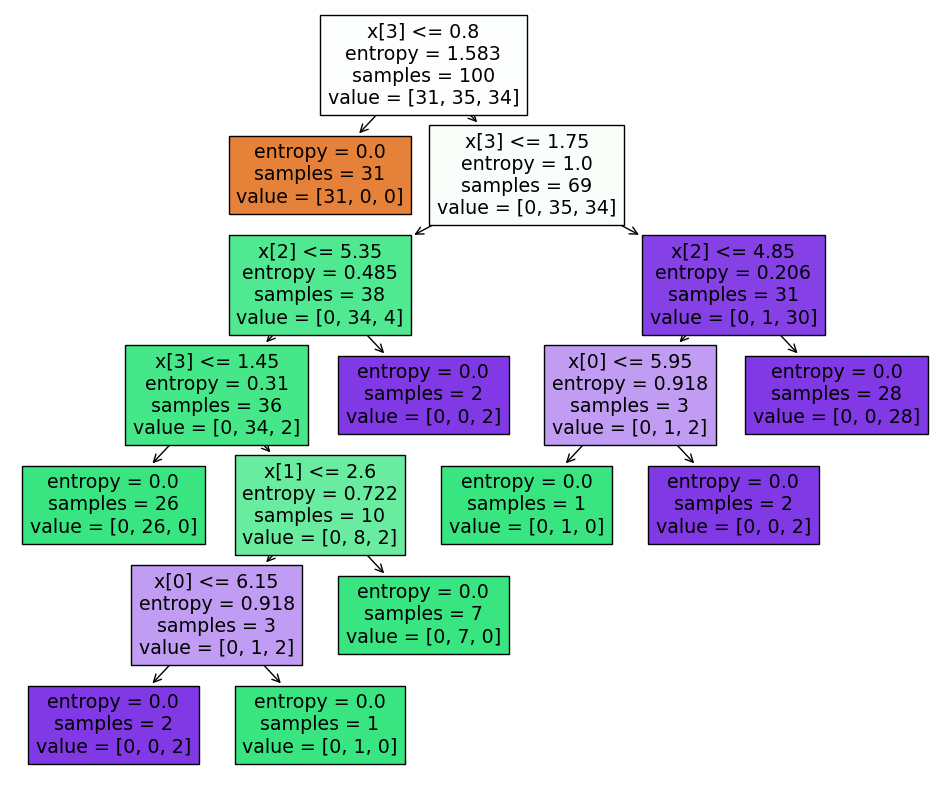

In [23]:
#creatuing classifier instance
classifier = DecisionTreeClassifier(criterion='entropy')

#fitting the train data
classifier.fit(x_train,y_train)

#printing decision tree
plt.figure(figsize=(12,10))
tree.plot_tree(classifier,filled=True)

[Text(0.4, 0.8333333333333334, 'x[3] <= 0.8\nentropy = 1.583\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.6, 0.5, 'x[3] <= 1.75\nentropy = 1.0\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.485\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.206\nsamples = 31\nvalue = [0, 1, 30]')]

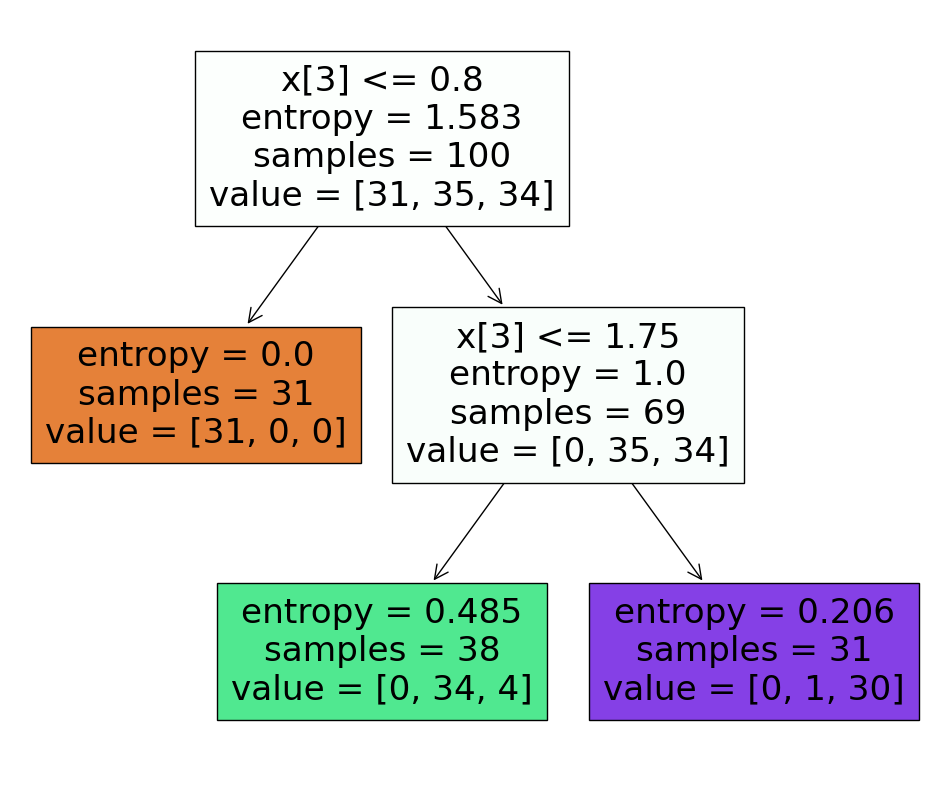

In [24]:
#post-pruning
classifier_post_prun=DecisionTreeClassifier(criterion='entropy',max_depth=2)
classifier_post_prun.fit(x_train,y_train)

#plotting Decision tree
plt.figure(figsize=(12,10))
tree.plot_tree(classifier_post_prun,filled=True)

In [25]:
#predicting after post pruning
y_pred = classifier_post_prun.predict(x_test)

#printing accuracy
print(accuracy_score(y_pred=y_pred,y_true=y_test))
print(classification_report(y_pred=y_pred,y_true=y_test))

0.98
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



## DecisionTree Prepruning And Hyperparameter Tuning For Huge Data

In [29]:
#parameters to to give to GridSearchCV
parameter={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2']
    
}

#estimater instance to provide to GridSearchCV
classifier_forGridSearchCV = DecisionTreeClassifier()
clf = GridSearchCV(classifier_forGridSearchCV,param_grid=parameter,cv=5,scoring='accuracy')

#fitting train data
clf.fit(x_train,y_train)

#getting best parameters for training 
print(clf.best_params_)

#predicted data
y_pred_pre_prun = clf.predict(x_test)

print(accuracy_score(y_true=y_test, y_pred=y_pred_pre_prun))
print(classification_report(y_pred=y_pred_pre_prun, y_true=y_test))

{'criterion': 'gini', 'max_depth': 3, 'max_features': 'log2', 'splitter': 'best'}
0.98
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



# 2. Decision Tree Regressor

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [22]:
#dataset
california_df = fetch_california_housing()

#creating DAtaframe 
df = pd.DataFrame(data=california_df.data,columns=california_df.feature_names)
df['Target'] = california_df.target

In [23]:
# df.head(2)
df.shape

(20640, 9)

#### Just for fast hyper parameter tuning let's take less record

In [24]:
df = df.sample(frac=0.25)
df.shape

(5160, 9)

In [25]:
#independent features
X=df.iloc[:,:-1]
#dependent features
y=df.iloc[:,-1]

In [26]:
### train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [27]:
#creating DT_regressor instance
dt_regressor  = DecisionTreeRegressor()

#fitting values
dt_regressor.fit(X_train,y_train)

#getting predixctions
y_pred = dt_regressor.predict(X_test)

print(y_pred)

[2.528 0.819 4.184 ... 1.596 2.242 3.25 ]


In [28]:
#getting accuracy- r2_score for regressor
print(r2_score(y_pred=y_pred,y_true=y_test))

0.5488781590039286


### Hyperparameter tuning using GridSearch

In [29]:
## Hyperparameter Tunning
parameter={
 'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5,6,7,8,10,11,12],
  'max_features':['auto', 'sqrt', 'log2']
    
}

#regressor to feed to grid instance
dt_regressor_forGrid = DecisionTreeRegressor()

#GridSearchCV instance
dt_regressorCV = GridSearchCV(dt_regressor_forGrid,param_grid=parameter,cv=2,scoring='neg_mean_squared_error')

#fitting data into regressorCV
dt_regressorCV.fit(X_train,y_train)

#printing best parameters
print(f"best parameters\n{dt_regressorCV.best_params_}")

best parameters
{'criterion': 'friedman_mse', 'max_depth': 8, 'max_features': 'log2', 'splitter': 'best'}


In [33]:
#training new regression instance using best parameters
regressor_afterCV = DecisionTreeRegressor(criterion= 'friedman_mse', max_depth= 8, max_features= 'log2', splitter= 'best')

#fitting train data
regressor_afterCV.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=8,
                      max_features='log2')

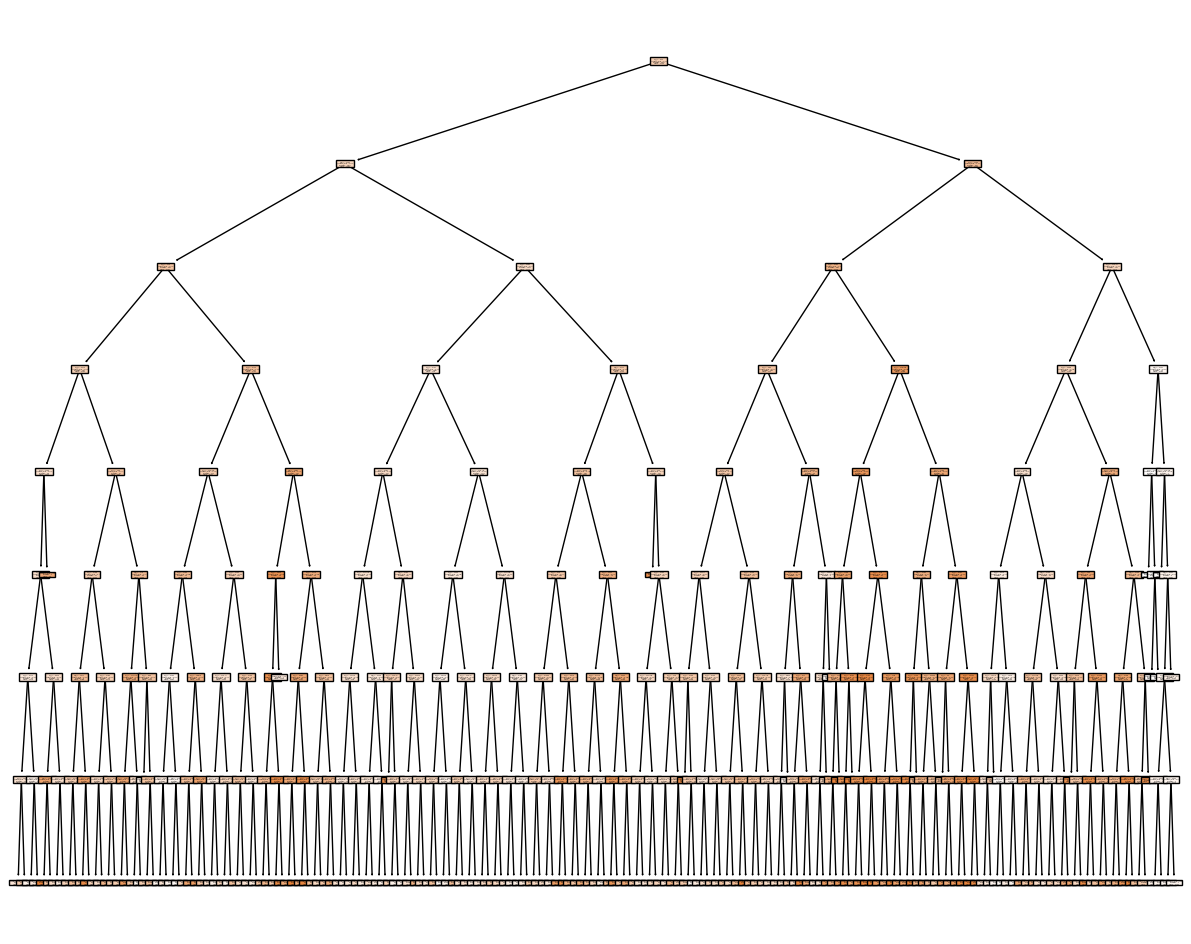

In [34]:
#plotting Decision Tree
plt.figure(figsize=(15,12))
tree.plot_tree(regressor_afterCV,filled=True)
plt.show()

In [35]:
#prediction data
y_pred = regressor_afterCV.predict(X_test)

print(f"accuracy: {r2_score(y_pred,y_test)}")

accuracy: 0.3841319872239427
